# 멜론에서 TOP100 차트 가져오기 !!
[ 2018.04.01. 첫 번째 세션 ] 9장 파이썬으로 데이터 수집하기

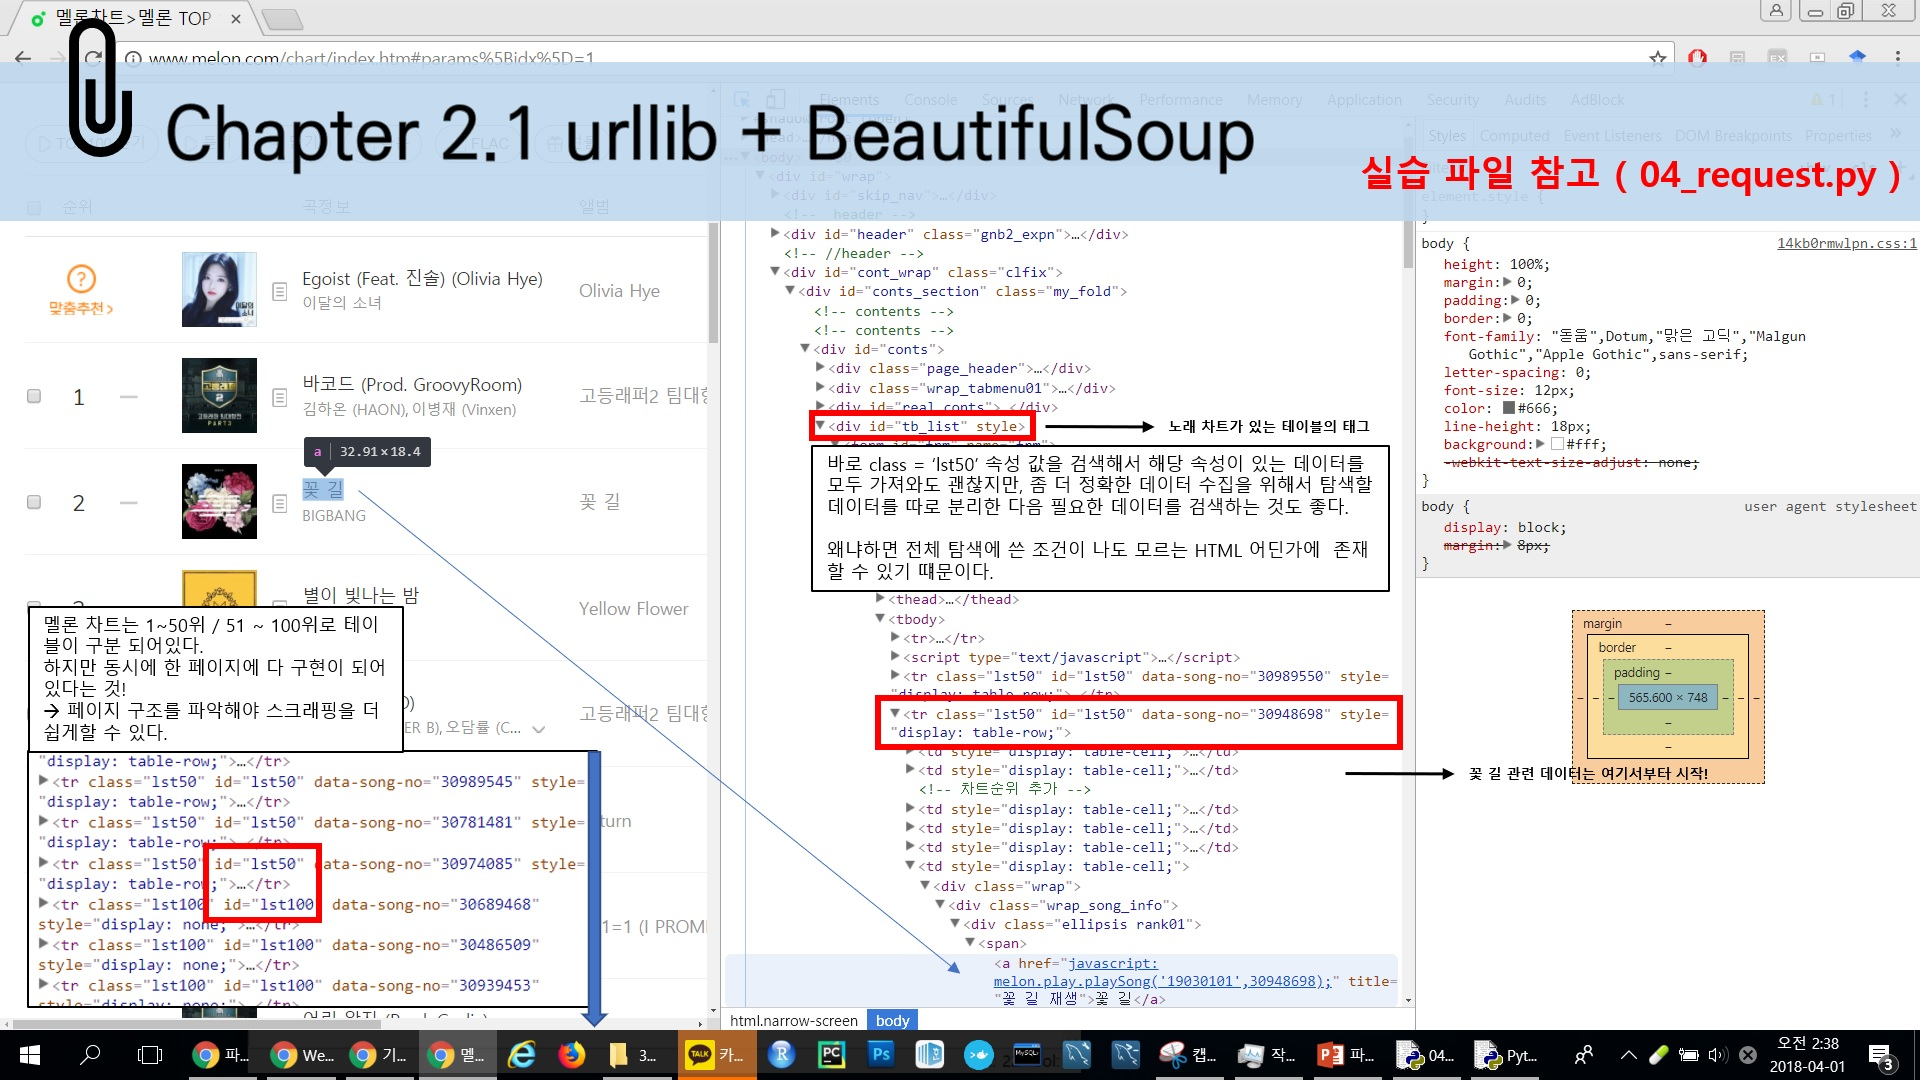

In [1]:
from bs4 import BeautifulSoup as bs              # 데이터파싱 라이브러리
import urllib.request as req                     # 데이터수신 라이브러리
import pandas as pd                              # 데이터정리 라이브러리 
import datetime                                  # 날짜데이터 라이브러리
import re                                        # 정규표현식 라이브러리

In [2]:
melon_list = pd.DataFrame(columns = ['artist',
                                     'artist_code',
                                     'title',
                                     'title_code',
                                     'rank',
                                     'date',
                                     'hour',
                                     'site'])

멜론에서 가져올 데이터를 저장할 데이터프레임을 만들어두자. <br>
<b>가수명, 가수 코드, 곡명, 곡 코드, (당일)순위, 날짜, 시간, 수집 사이트명</b>을 분류하여 저장할 것이다.<br><br>

In [3]:
melon_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
artist         0 non-null object
artist_code    0 non-null object
title          0 non-null object
title_code     0 non-null object
rank           0 non-null object
date           0 non-null object
hour           0 non-null object
site           0 non-null object
dtypes: object(8)
memory usage: 0.0+ bytes


잘 만들어졌나 확인 ~~ <br><br>

In [4]:
dt_now = datetime.datetime.now()
print(dt_now)

2018-04-07 16:15:40.533497


이거는 이따가 저장한 데이터가 있는 데이터프레임을 csv파일로 저장할 때, 파일명으로 사용하기 위함!<br><br>

In [5]:
url = "http://www.melon.com/chart/index.htm#params%5Bidx%5D=1"
header_ = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36"

In [6]:
_ = req.Request(url, headers = {'User-Agent':header_})
HTML = req.urlopen(_)
page = bs(HTML.read(), 'html.parser')

### 헤더 관련은 중요한 내용도 아니고 그냥 오류가 발생했을 때 이렇게 코드를 한다더라 정도만 알면 될 것 같다.

멜론은 User-Agent헤더 값이 없으면 성공적으로 접속을 하여도 빈 데이터를 반환해준다.따라서 User-Agent헤더 값을 지정 해주어야한다.<br> ( 다른 사이트는 그렇지 않은 경우도 많다. 만약에 스크래핑을 하다 이런 오류가 발생하면 그 때 정의를 해주면 된다.) <br><br>
** 분명히 제대로 된 URL임에도 불구하고 401, 403, 404 에러가 발생하는 경우에도 이처럼 헤더를 설정하면 되는 경우도 있다고 한다.<br><br>

In [7]:
print(HTML.getcode()) # 200이 뜨면 잘 불러온 것.  # 잘 불러왔다!

200


In [8]:
songtable = page.find("table", {"border":"1"})
songlists50 = songtable.findAll('tr', {'class':'lst50'})
songlists100 = songtable.findAll('tr', {'class':'lst100'})

In [9]:
def rank_breaker(_):
    global melon_list
    song_artist = _.find("span", {'class':'checkEllipsis'}).get_text().strip()

    ac = _.find('span', {'class':'checkEllipsis'})
    p = re.compile('[0-9]+')
    song_artist_code = int(p.findall(str(ac))[0])

    song_title = _.find("div", {'class':'ellipsis rank01'}).get_text().strip()
    song_title_code = int(_['data-song-no'])
    song_rank = int(_.find("span", {'class' : "rank "}).get_text())
    song_date = dt_now.strftime('%Y-%m-%d')
    song_hour = dt_now.strftime('%H')
    song_site = "melon"

    
    melon_list = melon_list.append(
        {'artist':song_artist,
         'artist_code':song_artist_code,
         'title' : song_title,
         'title_code' : song_title_code,
         'rank' : song_rank,
         'date' : song_date,
         'hour' : song_hour,
         'site' : song_site}, ignore_index = True)

In [10]:
for half in [songlists50, songlists100]:
    for _ in half:
        rank_breaker(_)

In [11]:
melon_list.to_csv(dt_now.strftime("%Y_%m_%d_%H")+".csv", index=False, encoding = 'euc-kr')

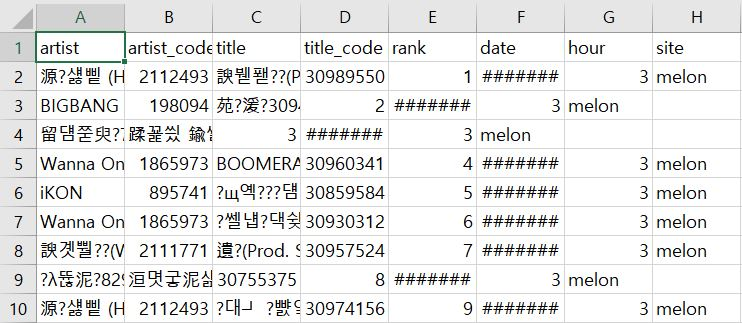
<br>위와 같이 문자가 깨질 경우에는 인코딩을 변경해주어야 한다.<br>
보통 'euc-kr', 'UTF-8', 'cp949' 이 셋 중 하나를 해주면 보통은 해결 된다.